In [ ]:
import pandas as pd
import numpy as np
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

train_df.columns = ["id", "topic", "sentiment", "text"]
val_df.columns = ["id", "topic", "sentiment", "text"]

train_df

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
train_df.isnull().sum()

,0
id,0
topic,0
sentiment,0
text,686


In [ ]:
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)

train_df.shape, val_df.shape

((73996, 4), (1000, 4))

In [ ]:
stop_words = stopwords.words('english')
ps = PorterStemmer()

In [ ]:
def preprocessing(text):
    text = text.lower()
    token = nltk.word_tokenize(text)

    new = []
    for i in token:
        if i not in stop_words and i not in string.punctuation:
            stem_word = ps.stem(i)
            new.append(stem_word)

    return " ".join(new)

In [ ]:
nltk.download('punkt_tab')
train_df["clean_text"] = train_df["text"].apply(preprocessing)
val_df["clean_text"] = val_df["text"].apply(preprocessing)

train_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,topic,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realiz window partit mac like 6 year behind nv...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realiz mac window partit 6 year behind nvidia ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realiz window partit mac 6 year behind nvidia ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realiz window partit mac like 6 year behind nv...


In [ ]:
train_df = train_df[train_df["sentiment"].isin(["Positive", "Negative"])]
val_df = val_df[val_df["sentiment"].isin(["Positive", "Negative"])]

train_df["label"] = train_df["sentiment"].map({"Positive": 1, "Negative": 0})
val_df["label"] = val_df["sentiment"].map({"Positive": 1, "Negative": 0})

train_df["label"].value_counts()

/tmp/ipython-input-883981653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["label"] = train_df["sentiment"].map({"Positive": 1, "Negative": 0})


,count
label,
0,22358
1,20655


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
X_train = vector.fit_transform(train_df["clean_text"])
y_train = train_df["label"]

X_test = vector.transform(val_df["clean_text"])
y_test = val_df["label"]

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9429097605893186

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       266
           1       0.94      0.95      0.94       277

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[250,  16],
       [ 15, 262]])

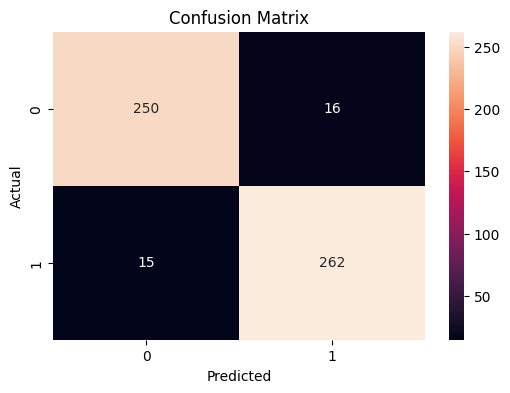

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
negative_words = [
    "puncture", "punctured", "tyre", "tire", "broke", "broken", "damage", "damaged",
    "worst", "bad", "disappointing", "hate", "angry", "sad",
    "problem", "issue", "fail", "failed", "failure", "crash",
    "loss", "pain", "tired", "annoying", "terrible", "useless",
    "sick", "hurt", "waste", "poor", "error"
]

In [ ]:
def pred_text(text):
    lower_text = text.lower()

    for word in negative_words:
        if word in lower_text:
            return "negative 😠"

    text = preprocessing(text)
    vec = vector.transform([text])
    predict = log.predict(vec)[0]

    if predict == 1:
        return "positive 😊"
    else:
        return "negative 😠"

In [ ]:
pred_text("This game is amazing and I love it")

'positive 😊'

In [ ]:
pred_text("This is the worst update ever, totally disappointing")

'negative 😠'

In [ ]:
pred_text("My car tyre got punctured")

'negative 😠'